In [ ]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [ ]:
from tensorflow import keras

https://github.com/zalandoresearch/fashion-mnist


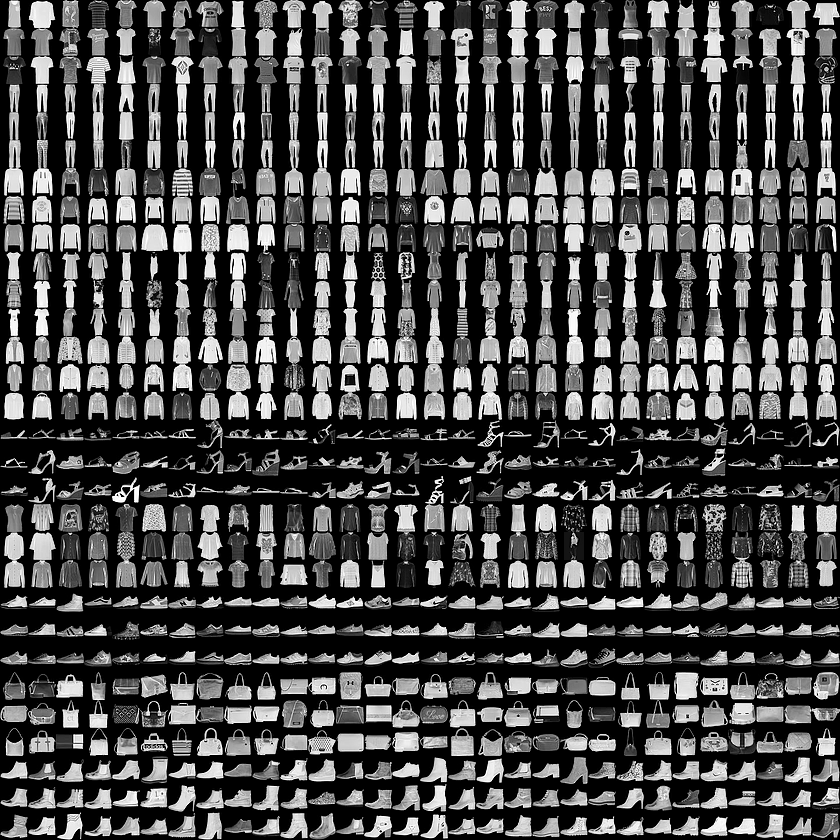

In [ ]:
mnist = tf.keras.datasets.fashion_mnist
mnist

<module 'keras.api._v2.keras.datasets.fashion_mnist' from '/usr/local/lib/python3.10/dist-packages/keras/api/_v2/keras/datasets/fashion_mnist/__init__.py'>

`tf.keras.datasets.fashion_mnist` consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.

In [ ]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
# add names to label dataset instead of numeric labels
class_names = ['T-shirst/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [ ]:
# check the shape the tensor of training set
training_images.shape

(60000, 28, 28)

In [ ]:
# number of labels in training = number of image (every image has a label)
len(training_labels)

60000

In [ ]:
test_images.shape
len(test_labels)

10000

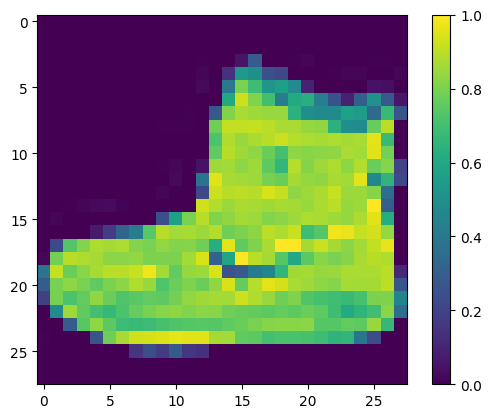

In [ ]:
# visualize the data
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(training_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
# Normalization (scalling)
training_images = training_images/255.0
test_images = test_images/255.0

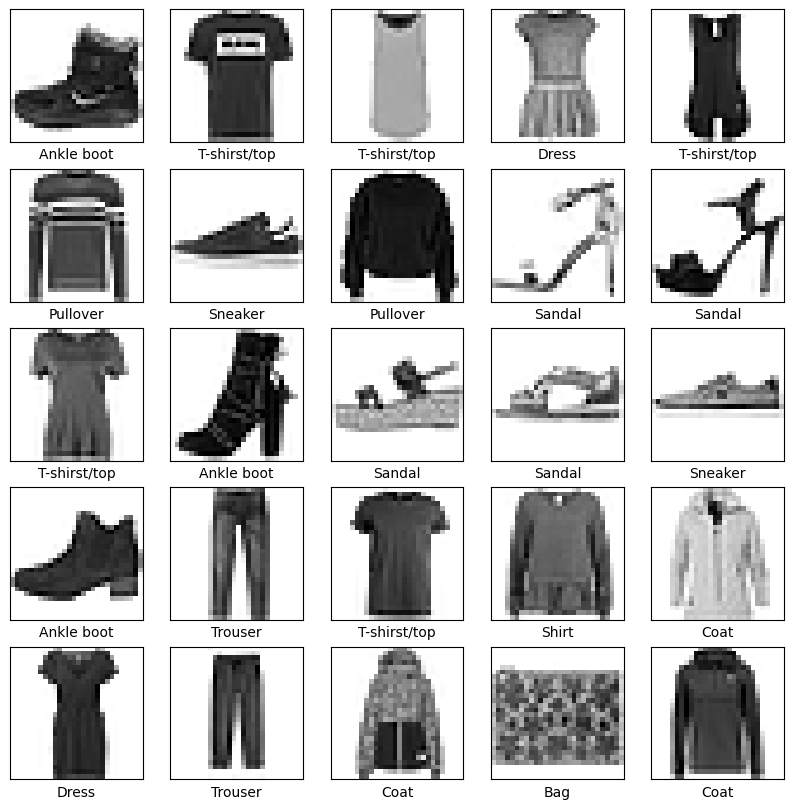

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))

# Show first 25 images
for i in range(25):
    plt.subplot(5, 5, i + 1)  # Show every image individually in a 5x5 grid
    plt.xticks([])  # X-axis ticks
    plt.yticks([])  # Y-axis ticks
    plt.grid(False)
    plt.imshow(training_images[i], cmap=plt.cm.binary)  # Display the image in binary colormap (grayscale)
    plt.xlabel(class_names[training_labels[i]])  # Display the corresponding class label

plt.show()


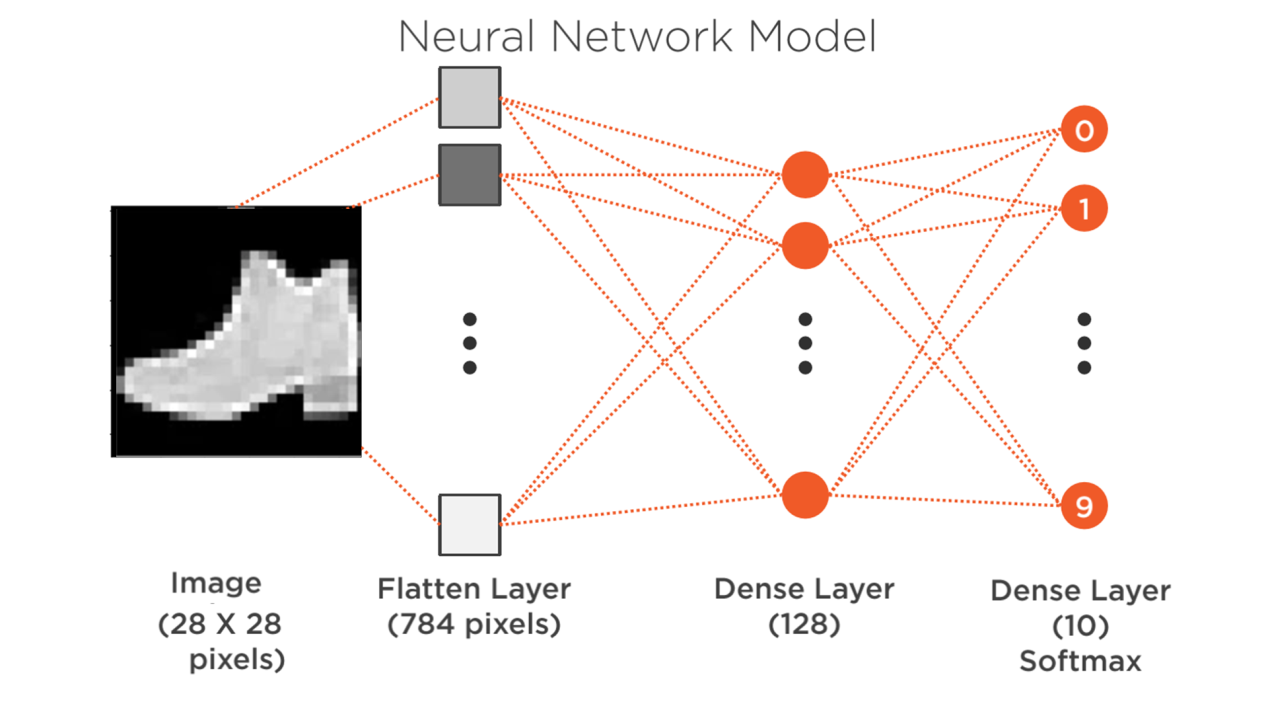

In [ ]:
28*28

784

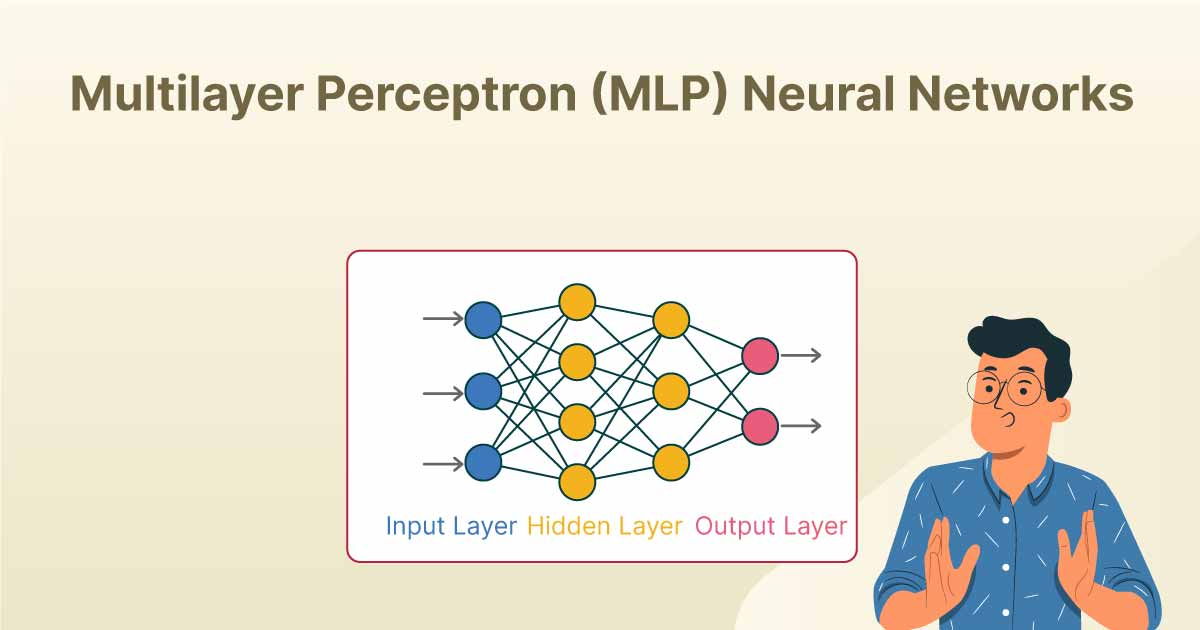

# design a 3 layer neural net 1-one input layer 2-one hidden layer 3-one output layer

In [ ]:
## 1 ## create the model with the indefication for layers input and output
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # First layer Flatten() detects the input dimensions of the image
    keras.layers.Dense(128, activation='relu'),  # Second layer Dense=neural, activation=ReLU
    keras.layers.Dense(10, activation='softmax')  # Last layer, activation=Softmax
])

In [ ]:
## 2 ## detect the hyperparameters
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'] # show the accuracy of training each epoch for training data
)


In [ ]:
## 3 ## Start fitting and training the model
model.fit(training_images, training_labels, epochs=10) # detect the number of epochs

Epoch 1/10
1875/1875 [==============================] - 6s 2ms/step - loss: 0.5001 - accuracy: 0.8245
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3748 - accuracy: 0.8655
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3391 - accuracy: 0.8756
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3152 - accuracy: 0.8831
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2943 - accuracy: 0.8917
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2818 - accuracy: 0.8956
Epoch 7/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2683 - accuracy: 0.9010
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2584 - accuracy: 0.9044
Epoch 9/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2470 - accuracy: 0.9070
Epoch 10/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.238

In [ ]:
## 4 ## evaluate the model based on test data
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)


313/313 - 1s - loss: 0.3487 - accuracy: 0.8791 - 988ms/epoch - 3ms/step

Test accuracy: 0.8791000247001648


In [ ]:
## 5 ## Prediction
predict = model.predict(test_images)

import numpy as np
np.argmax(predict[0])

313/313 [==============================] - 1s 2ms/step


9

In [ ]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPool2D  # import the components of convolution neural networks
from keras import backend as k  # call keras inside the program as "k" latter


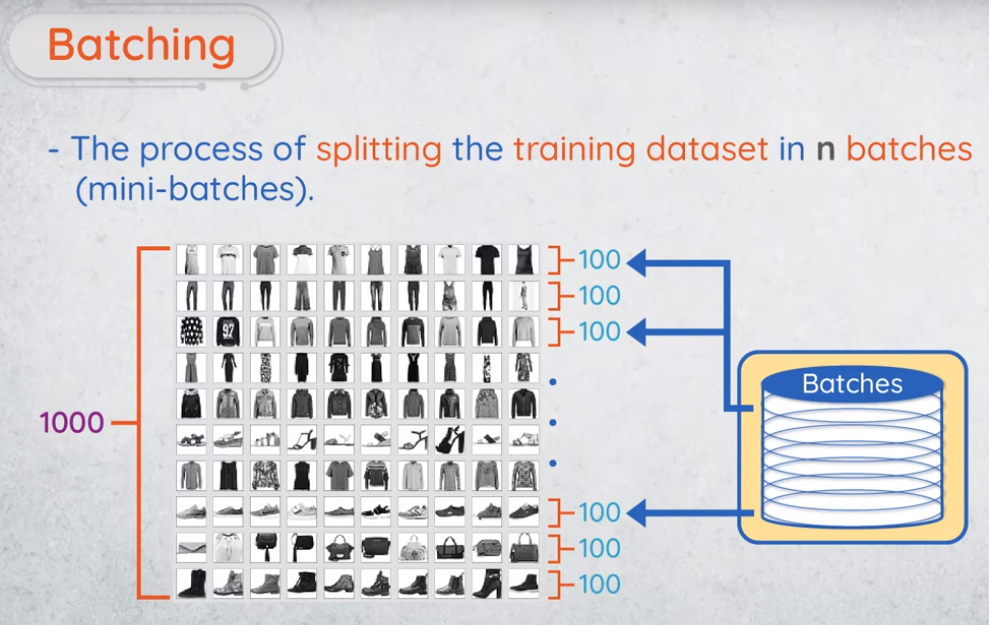



> **Epoch** : one forward pass and one backward pass of all the training examples.


In [ ]:
## 1 ##
# prepare the data
batch_size = 128 # split the data to many batches / each batch contains many samples
num_classes = 10 # number of unique classes in the labels
epochs = 12

In [ ]:
## 2 ##
# define the dimensions of the image
# 28*28 grayscale image
img_rows, img_cols = 28, 28
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
## 3 ##
# define keras image format // ensuring that the data is fed into the neural network with the correct shape.
if k.image_data_format() == 'channels_first': # `channels_first` mean grey scale
  x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
  x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
  input_shape = (1, img_rows, img_cols)

else:
  x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
  x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
  input_shape = (1, img_rows, img_cols)


## 4 ##
## Normalization
x_train = x_train/255.0
x_test = x_test/255.0

# check the shape of image after normalization
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

x_train shape: (60000, 1, 28, 28)
x_test shape: (10000, 1, 28, 28)




> 60000 images




> 1 channel one = grey scale




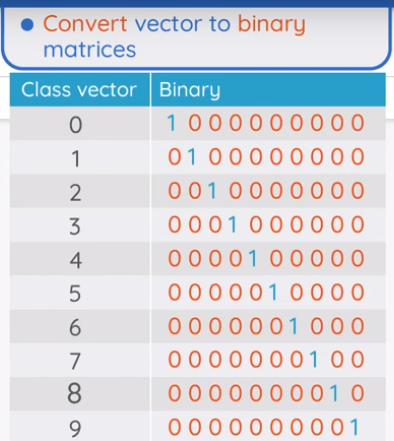

In [ ]:
## 5 ##
# convert the class vector into metrices binary class / to help me binary classification
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

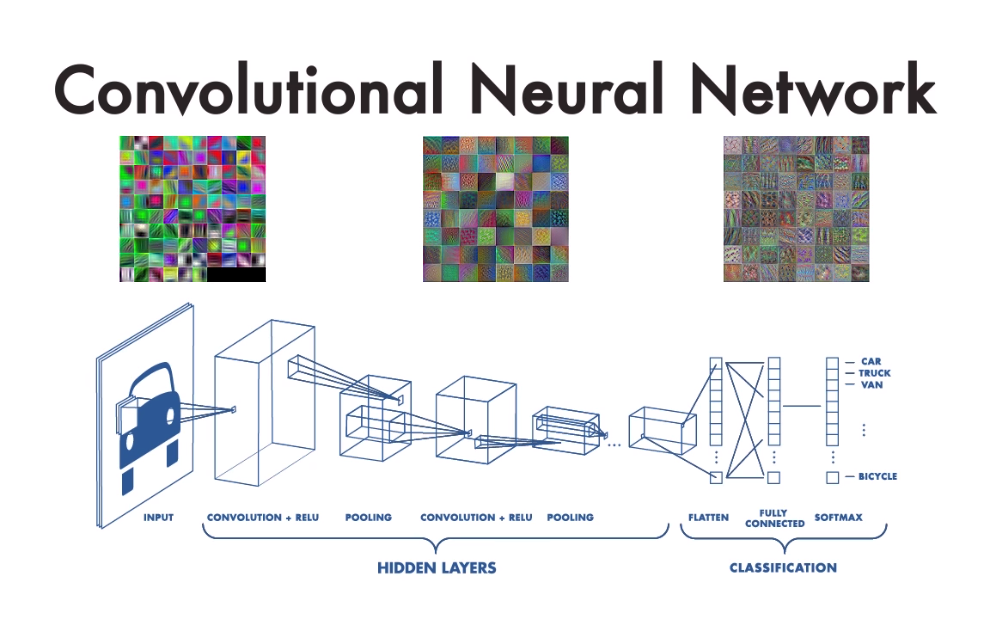

# **Outlining the model**

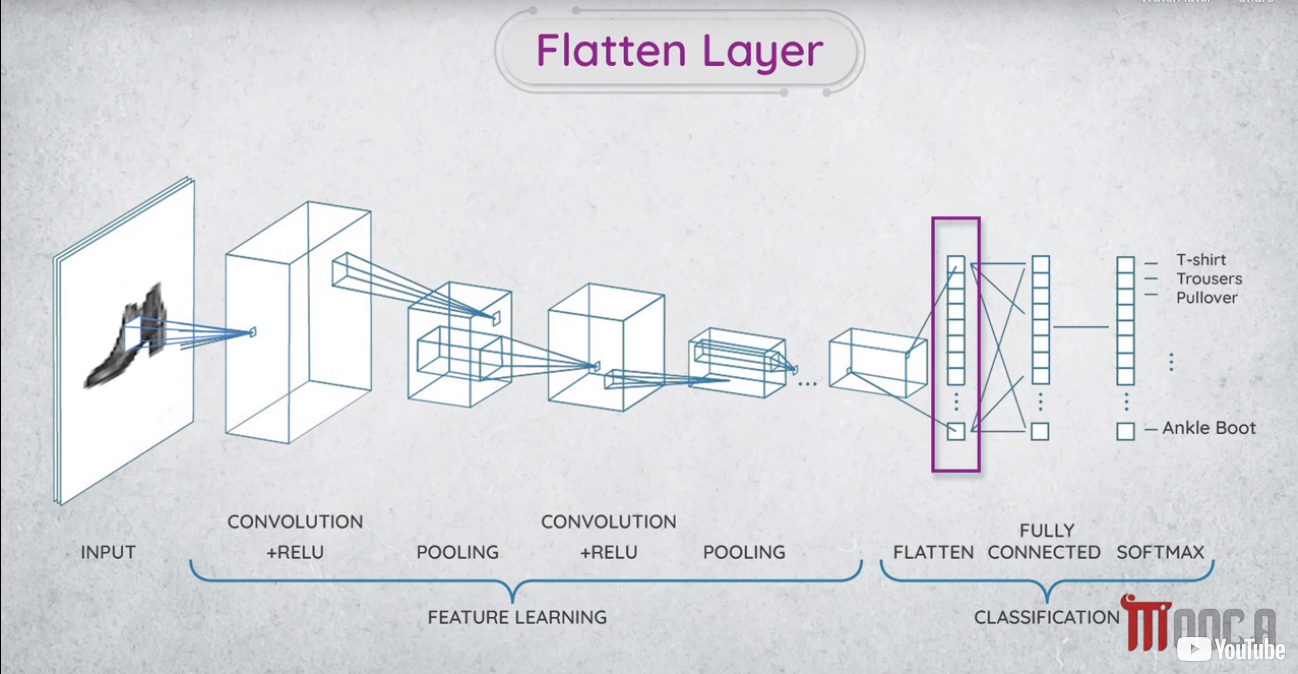

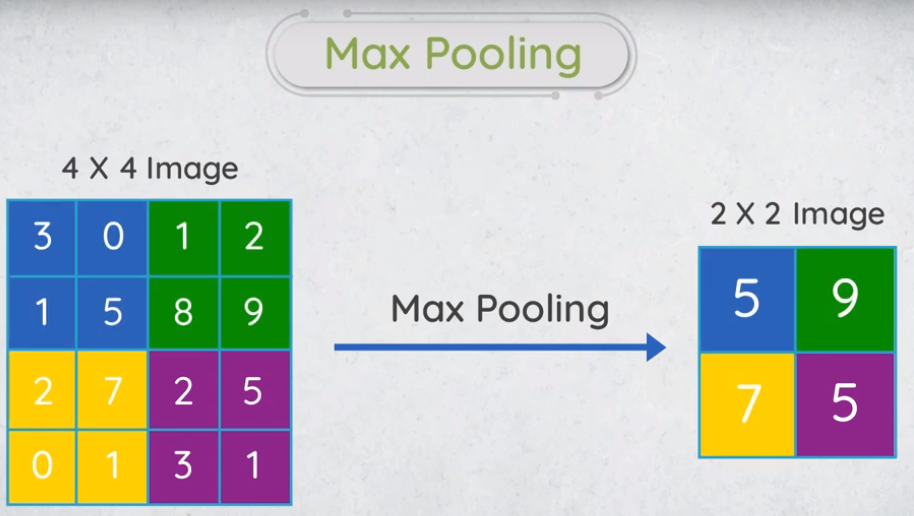



> **Max Pooling** : take the largest number



In [ ]:

## 0 ##
# load libraries
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPool2D  # import the components of convolution neural networks
from keras import backend as k  # call keras inside the program as "k" latter
###########################################################
## 1 ##
# prepare the data
batch_size = 128 # split the data to many batches / each batch contains many samples
num_classes = 10 # number of unique classes in the labels
epochs = 12
###########################################################
## 2 ##
# define the dimensions of the image
# 28*28 grayscale image
img_rows, img_cols = 28, 28
(x_train, y_train), (x_test, y_test) = mnist.load_data()
###########################################################
## 3 ##
# define keras image format // ensuring that the data is fed into the neural network with the correct shape.
if k.image_data_format() == 'channels_first': # `channels_first` mean grey scale
  x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
  x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols,  1)
  input_shape = (img_rows, img_cols, 1)

else:
  x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
  x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols,  1)
  input_shape = (img_rows, img_cols, 1)

###########################################################
## 4 ##
## Normalization
x_train = x_train/255.0
x_test = x_test/255.0

# check the shape of image after normalization
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
###########################################################
## 5 ##
# convert the class vector into metrices binary class / to help me binary classification
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
###########################################################
## 6 ## create the model
model = Sequential()
# 1st layer => Convolution layer = input layer
model.add(Conv2D(32, kernel_size=(3,3), activation='relu',  kernel_initializer='he_uniform', input_shape=input_shape)) # 32 number of filters

# 2nd layer => Convolution layer also
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))

# 3rd layer => Max pooling which should follow each convolution layer with relu
model.add(MaxPool2D(pool_size=(2,2)))

# 4th layer => Flatten like dimensionality convertion from multiple into single dimension to start networking
model.add(Flatten())

# 5th layer => Dense layer fully connected neurons
model.add(Dense(128, activation='relu',  kernel_initializer='he_uniform')) # 128 number of neurons

# The last layer => Softmax for classification
model.add(Dense(num_classes, activation='softmax'))

# check the summary of the model
model.summary()
###########################################################
## 7 ##
# Compile the model
opt = SGD(lr=0.01, momentum=0.9) # you can create your own optimzer or use build-in one like Adam or Adadelta
model.compile(
    loss=keras.losses.categorical_crossentropy,
    optimizer= keras.optimizers.Adadelta(),
    metrics=['accuracy']  # Corrected from 'metrices' to 'metrics'
)

###########################################################
## 8 ##
# Fit the model
model.fit(x_train, y_train, batch_size=batch_size,
          epochs=epochs,
          verbose = 1,
          validation_data=(x_test,y_test))
###########################################################
## 9 ##
# evaluate the model
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss=', score[0])
print('Test accuracy', score[1])
###########################################################
## 10 ##
# Saving the model
model.save("model.h5") # there are many options of saving formats = YAML, JSON or H5
print("Saved")
###########################################################
###########################################################
###########################################################
###########################################################
###########################################################
## 11 ##
# Restoring Model and Making predictions
# Like another process and steps
from keras.preprocessing.image import load_img # load the image
from keras.preprocessing.image import img_to_array # convert the image into array format
from keras.models import load_model  # import my saved model

#  preprocessing function
def load_img(filename):
  img = load_img(filename, greyscale=True, target_size(28,28)) # load image
  img = img_to_array(img) # convert the image into array format
  img = img.reshape(1, 28, 28, 1) # reshaping the img to single sample with one channel (= grey scale) => 1 = single img/ 28*28 = dimensions/ 1 = greyscale
  img = img.astype('float32') # preparing to pixel data => make img the same of type that used in previous saved model
  img = img/255.0 # Normalization
  return img

###########################################################
## 12 ##
# prediction

# Upload new data image to predict it
def run_example():
  img = load_img("/content/drive/MyDrive/Deep learning/iTi Deep Learning/sample_image.png") # loading img
  model = load_model('PATH model.h5') # loading the model
  result = model.prediction_classes(img) # prediction the class
  print(result[0])

# entry point, run the example
run_example

###########################################################
###########################################################
###########################################################
###########################################################
###########################################################
# If the prediction is wrong, we need to inhance the model to increase its accuracy.
## 13 ##
# Improving Predictive Accuracy

# tuning the hyperparameters in the model
def define_model():

      model = Sequential()
      # 1st layer => Convolution layer = input layer
      model.add(Conv2D(32, kernel_size=(3,3), activation='relu', kernel_initializer='he_uniform' ,input_shape=input_shape)) # 32 number of filters
      # 3rd layer => Max pooling which should follow each convolution layer with relu
      model.add(MaxPool2D(pool_size=(2,2)))
      # 4th layer => Flatten like dimensionality convertion from multiple into single dimension to start networking
      model.add(Flatten())
      # 5th layer => Dense layer fully connected neurons
      model.add(Dense(100, activation='relu',  kernel_initializer='he_uniform')) # <<<<<<<<<<<<<<<< change the dense into 100 number of neurons
      # The last layer => Softmax for classification
      model.add(Dense(num_classes, activation='softmax'))
      # Compile the model
      opt = SGD(lr=0.01, momentum=0.9) # you can create your own optimzer or use build-in one like Adam or Adadelta <<<<<<<<<<<<<<<<<<<< change the optimizer
      model.compile(
          loss=keras.losses.categorical_crossentropy,
          optimizer=opt, # keras.optimizers.Adadelta()
          metrics=['accuracy']  # Corrected from 'metrices' to 'metrics'
      )

      return model

# run the test harness for evaluating a model
def run_example():
  # load dataset
  trainX, trainY, testX, testY = load_dataset()
  # prepare pixel data
  trainX, testX = prep_pixels(trainX, testX)
  # define model
  model = define_model()
  # fit model
  model.fit(trainX, trainY, epochs=10, batch_size=32, verbose=0) # <<<<<<<<<<<<<<<<<<<<<<<<<<< change the number of epoch and batch_size
  # save model
  model.save('final_model.h5')

# entry point, run the test
run_example()

x_train shape: (60000, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 12, 12, 64)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 9216)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               1179776   
                                                                 
 dense_3 (Dense)             (None, 10)              

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# # Restoring Model and Making predictions
# Like another process and steps
from keras.preprocessing.image import load_img # load the image
from keras.preprocessing.image import img_to_array # convert the image into array format
from keras.models import load_model  # import my saved model

#  preprocessing function
def load_img(filename):
  img = load_img(filename, greyscale=True, target_size(28,28)) # load image
  img = img_to_array(img) # convert the image into array format
  img = img.reshape(1, 28, 28, 1) # reshaping the img to single sample with one channel (= grey scale) => 1 = single img/ 28*28 = dimensions/ 1 = greyscale
  img = img.astype('float32') # preparing to pixel data => make img the same of type that used in previous saved model
  img = img/255.0 # Normalization
  return img


In [ ]:
# Prediction